# Solution

In [ ]:
from igraph import *
import json
import random
import numpy as np
from numpy import linalg 
import itertools
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay  # needed for triangulation
import os
import pandas as pd
from copy import deepcopy

In [ ]:
random.seed(2022)
np.random.seed(2022)

In [ ]:
with open('los_angeles_censustracts.json') as f:
    census_tracts = json.loads(f.readline())

In [ ]:
census_tracts['features'][0]['properties']

{'MOVEMENT_ID': '1', 'TRACT': '480302', 'DISPLAY_NAME': 'Census Tract 480302'}

In [ ]:
np.array(census_tracts['features'][0]['geometry']['coordinates'][0]).mean(axis=0)  # [longitude, latitude]

array([-118.12053321,   34.10309557])

In [ ]:
display_names = dict()
coordinates = dict()

for area in census_tracts['features']:
    id = int(area['properties']['MOVEMENT_ID'])
    display_name = area['properties']['DISPLAY_NAME']
    display_names[id] = display_name
    a = area['geometry']['coordinates'][0]
    coordinates[id] = np.array(a if type(a[0][0]) == float else a[0]).mean(axis=0)

In [ ]:
for i in range(5):
    key = i + 1
    print('{}: {}, {}'.format(key, display_names[key], coordinates[key]))

1: Census Tract 480302, [-118.12053321   34.10309557]
2: Census Tract 480303, [-118.13785063   34.09645121]
3: Census Tract 480304, [-118.13138209   34.09626386]
4: Census Tract 480400, [-118.13224544   34.10349303]
5: Census Tract 480500, [-118.14492317   34.0986815 ]


In [ ]:
g = Graph(directed=False)
g.add_vertices(len(display_names))
g.vs['display_name'] = list(display_names.values())  # index = id - 1
g.vs['coordinates'] = list(coordinates.values())

In [ ]:
month_filter = {12}  # for monthly aggregate data of 4th quarter, we can filter data based off of only December

edges = []
weights = []

with open('los_angeles-censustracts-2019-4-All-MonthlyAggregate.csv') as f:
    f.readline()  # skip the first line
    
    while True:
        line = f.readline()
        if line == '':
            break  # end of file
        
        vals = line.strip().split(',')
        
        # read edge info
        src, dest, month, dist = int(vals[0]), int(vals[1]), int(vals[2]), float(vals[3])

        # if data is not relevant, skip it
        if month not in month_filter:
            continue
            
        edges.append((src - 1, dest - 1))
        weights.append(dist)  

In [ ]:
g.add_edges(edges)
g.es['weight'] = weights
del edges, weights

In [ ]:
print(len(g.vs), len(g.es))

2716 1692450


In [ ]:
# keep only the giant connected component
components = g.components()
gcc = max(components, key=len)
vs_to_delete = [i for i in range(len(g.vs)) if i not in gcc]
g.delete_vertices(vs_to_delete)

# remove duplicate edges
g = g.simplify(combine_edges=dict(weight='mean'))  # combine duplicate edges

In [ ]:
print(len(g.vs), len(g.es))

2649 1003858


In [ ]:
mst = g.spanning_tree(weights=g.es['weight'])

In [ ]:
edf = mst.get_edge_dataframe()
edf.head()

,source,target,weight
edge ID,,,
0,0,2,129.765
1,0,13,118.335
2,1,2,90.235
3,1,3,126.475
4,1,9,125.675


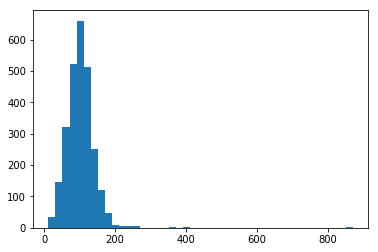

In [ ]:
import matplotlib.pyplot as plt
weights = mst.es['weight']
binwidth = 20
bins = np.arange(min(weights), max(weights) + binwidth, binwidth)
plt.hist(weights, bins=bins)
plt.show()

In [ ]:
for i, e in enumerate(mst.es):
    print('Distance in miles: {:.3f}\nTime taken: {:.1f}\n---------\n'.format(linalg.norm(mst.vs[e.source]['coordinates'] - mst.vs[e.target]['coordinates'])* 69, e['weight']))
    if i > 10:
        break

Distance in miles: 0.885
Time taken: 129.8
---------

Distance in miles: 0.570
Time taken: 118.3
---------

Distance in miles: 0.447
Time taken: 90.2
---------

Distance in miles: 0.621
Time taken: 126.5
---------

Distance in miles: 0.812
Time taken: 125.7
---------

Distance in miles: 0.618
Time taken: 119.9
---------

Distance in miles: 0.936
Time taken: 125.2
---------

Distance in miles: 0.412
Time taken: 91.8
---------

Distance in miles: 0.256
Time taken: 60.9
---------

Distance in miles: 0.204
Time taken: 87.1
---------

Distance in miles: 0.620
Time taken: 110.9
---------

Distance in miles: 0.493
Time taken: 162.3
---------



# TSP Approximation

### Check Traingle Inequality

In [ ]:
def is_triangle(sides):
    #write code here 
    return True 

print('Test:', is_triangle([1,4,2]), is_triangle([3,5,3]))

In [ ]:
def sample_triangles(g, n_samples):
    #result = list()
    #result will have tuple of the the vertices of a triangle 
    return result 

In [ ]:
n_samples = 1000  # WARNING: this might take a minute for larger sample sizes
triangles = 0
sampled = sample_triangles(g, n_samples)

for triangle_vs in sampled:
    
    edge_lengths = []
    
    for i in range(3):
        for j in range(i):
            edge_lengths.append(min(g.es.select(_between=([triangle_vs[i]], [triangle_vs[j]]))['weight']))   
            
    triangles += is_triangle(edge_lengths)
    
print('Triangle inequality holds by {}%'.format(round(100.0 * triangles / n_samples, 1)))

In [ ]:
def preorder_traversal(root, root_parent=None):
    result = [root]
    
    #write code here 
        
    return result

### Preorder Traversal Demo

In [ ]:
t = Graph.Tree(20, 3)

visual_style = {}
visual_style["vertex_color"] = 'yellow'
visual_style["vertex_label"] = [v.index for v in t.vs]
visual_style["vertex_label_color"] = 'blue'
visual_style["bbox"] = (200, 200)

plot(t, **visual_style)

In [1]:
print([v.index for v in preorder_traversal(t.vs[0])])

NameError: ignored

### Actual Data

In [ ]:
tsp = #refer to slides 
print('IDs:\n' + '-' * 10 + '\n' + '\n'.join([mst.vs[i]['display_name'] for i in tsp]))

In [ ]:
hop_distances = ##refer to slides 
print('Hop distances:\n' + '-' * 10 + '\n' +
      '\n'.join(['{:.3f}'.format(x) for x in hop_distances.tolist()]))

### Measureing Relative Performance Guarantee

In [ ]:
mst_cost = sum(mst.es['weight'])

<hr><b><font color="red">WARNING: SLOW!</font></b>

In [ ]:
tsp_cost = 0
for i in range(len(tsp)):
    if i % 100 == 0:
        print(i)
        
    #write code 

In [ ]:
print('MST Cost:', round(mst_cost))
print('TSP Cost:', round(tsp_cost))
print('Ratio:', round(tsp_cost/mst_cost, 2))

---
TSP results should resemble the following figure

In [ ]:
all_coordinates = np.array(g.vs['coordinates'])
tsp_coordinates = all_coordinates[tsp, :]
tsp_coordinates = np.vstack([tsp_coordinates, tsp_coordinates[0, :]])  # connect the last element back to the first element

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(tsp_coordinates[:, 0], tsp_coordinates[:, 1],'-')
plt.show()

### Triangulation

In [ ]:
tri = #use the Delaunay function imported above 

In [ ]:
plt.figure(figsize=(15,15))
plt.triplot(coordinates[:, 0], coordinates[:, 1], tri.simplices.copy())
plt.show()

In [ ]:
edges_to_induce = []

for i in range(tri.simplices.shape[0]):
    for col1, col2 in ((0, 1), (1, 2), (0, 2)):
        #add the edges to edges_to_induce


In [ ]:
tri_g = g.subgraph_edges(edges_to_induce)

### Estimate Traffic Flows

In [ ]:
edge_ends = #write here 
sources, targets = #write here 
distances = #write here 
speeds =  # write here   # mph
car_length = 0.003  # (miles)
safety_distances = speeds * (2/3600)  # in miles, derived from 2 sec distance
cars_per_mile = #write here
n_lanes = 2
cars_per_hour = #write here 


In [ ]:
tri_g.es['capacity'] = cars_per_hour

# Max Flow Analysis

In [ ]:
source_coordinates = [-118.5670548, 34.0458901]  # malibu
dest_coordinates = [-118.1819374, 33.759958]  # long beach

### Calculate Max Flow

In [ ]:
print('Number of independent roads:', ) #max flow of graph (inbuilt is okay )
print('Number of cars per hour:', )

### Trimming Large-Distance (Non-Local) Roads

In [ ]:
trim_thresh = 800

In [ ]:
edges_to_induce = tri_g.es.select(weight_le=trim_thresh)
tri_g_trimmed = tri_g.subgraph_edges(edges_to_induce)

### Visualizing Trimming Scheme

<hr><b><font color="red">WARNING: SLOW!</font></b>

In [ ]:
# plot the roads
plt.figure(figsize=(15,15), dpi=200)
for e in tri_g.es:
    v1 = tri_g.vs[e.source]['coordinates']
    v2 = tri_g.vs[e.target]['coordinates']
    data = np.vstack([v1, v2])
    x = data[:, 0]
    y = data[:, 1]
    plt.plot(x, y, '#8ab4f7' if e['weight'] < trim_thresh else '#fc9c3c')
    
# mark the source and destination
# source = tri_g.vs.select(display_name=source_address)[0].index
# target = tri_g.vs.select(display_name=dest_address)[0].index
# v1 = tri_g.vs[source_idx]['coordinates']
# v2 = tri_g.vs[dest_idx]['coordinates']
# data = np.vstack([v1, v2])
# x = data[:, 0]
# y = data[:, 1]
# plt.plot(x, y, 'bo')


plt.axis('equal')
plt.show()

In [ ]:
print('Number of independent roads:', ) #max flow of TRIMMED graph
print('Number of cars per hour:', )

### Aside: Let's Get A Bit of Intuition about Data

In [ ]:

plt.subplot(211)
binwidth = 5
bins = np.arange(np.min(distances), np.max(distances) + binwidth, binwidth)
plt.hist(distances, bins=bins)
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.title('Histogram of Distances')
plt.show()

plt.subplot(212)
binwidth = 5
bins = np.arange(0, 100 + binwidth, binwidth)
plt.hist(speeds, bins=bins)#distances, bins=bins)
plt.xlabel('Speed (mph)')
plt.ylabel('Frequency')
plt.title('Histogram of Speeds')
plt.show()

<b>ROAD NETWORK</b>

In [ ]:
road_map = deepcopy(tri_g_trimmed)
len(road_map.vs), len(road_map.es)

Strategy 1 (geodistance_static)

In [ ]:
edge_ends = np.array([[e.source, e.target] for e in road_map.es])
sources, targets = edge_ends[:, 0], edge_ends[:, 1]
distances = #write here 
road_map.es['geo_distance'] = distances
vcount = len(road_map.vs)
max(distances)


In [ ]:
shortest_path_distance = #write here 
shortest_path_distance = np.array(shortest_path_distance)
shortest_path_distance.shape

In [ ]:
actual_geo_distances = np.zeros((vcount,vcount))
actual_geo_distances = None 
differences = None



In [ ]:
ind = #argsort differences to get max value 

In [ ]:
new_static_edges = []
for i in range(40): #40 because there will be repititions (A-> B is same as B-> A)
    if i%2 ==0:
        continue
    newedge = None
    print(#new edge nodes and the difference )
    new_static_edges.append(newedge)

In [ ]:
#add the new_static_edges to our graph. 

road_map_static = deepcopy(tri_g_trimmed) #ensure to use deepcopy
for edg in new_static_edges:
    start = edg[0]
    end = edg[1]
    dist = # which distance to use? 
    road_map_static.add_edge(start, end, weight = dist)

In [ ]:
# plot the roads and highlight our new edges. 
plt.figure(figsize=(15,15), dpi=200)
for e in road_map_static.es:
    start = e.source
    end = e.target
    cur_edge = sorted([start,end])

    v1 = road_map_static.vs[e.source]['coordinates']
    v2 = road_map_static.vs[e.target]['coordinates']
    data = np.vstack([v1, v2])
    x = data[:, 0]
    y = data[:, 1]
    if cur_edge in new_static_edges:
        print(cur_edge)
        plt.plot(x,y,'#FF0000') 
    else:
        plt.plot(x, y, '#8ab4f7')
    
# mark the source and destination
# source = tri_g.vs.select(display_name=source_address)[0].index
# target = tri_g.vs.select(display_name=dest_address)[0].index
# v1 = road_map_static.vs[source_idx]['coordinates']
# v2 = road_map_static.vs[dest_idx]['coordinates']
# data = np.vstack([v1, v2])
# x = data[:, 0]
# y = data[:, 1]
# plt.plot(x, y, 'bo')



plt.axis('equal')
plt.show()

In [ ]:
# A, B >1000, freq:10 ->10,000
#C, D = 500 , 10,000 - > 500*10,000

Strategy 2 (geo_distance, static, with_frequency)

In [ ]:
np.random.seed(2022)
frequencies = np.random.randint(1,1001, (vcount,vcount) )
frequencies.shape

In [ ]:
difference_frequency = np.multiply(differences,frequencies)

In [ ]:
ind = #argsort differences to get max value 

In [ ]:
for i in range(40): #40 because there will be repititions (A-> B is same as B-> A)
    if i%2 ==0:
        continue
    print(#new edge nodes and the difference )


Stategy 3 : (geo_distance, Dynamic)

In [ ]:
road_map_dynamic = deepcopy(road_map)
budget = 20
new_dynamic_edges = []
for i in range(budget):
    
    #get current graph shortest paths 
    #get differences 
    #sort differences and pich the highest         
    # get vertices of new edge to build. Build the edge and print its vertices. 
    new_egde = None
    print(new_Edge, difference_between_new_edge_vertices  )
    new_dynamic_edges.append(new_edge )

    #add the new edge 
    new_distance = #Get this 
    road_map_dynamic.add_edge(start, end, weight = -1 , geo_distance = new_distance)

In [ ]:
# plot the roads
plt.figure(figsize=(15,15), dpi=200)
for e in road_map_dynamic.es:
    start = e.source
    end = e.target
    cur_edge = sorted([start,end])

    v1 = road_map_dynamic.vs[e.source]['coordinates']
    v2 = road_map_dynamic.vs[e.target]['coordinates']
    data = np.vstack([v1, v2])
    x = data[:, 0]
    y = data[:, 1]
    if cur_edge in new_dynamic_edges:
        print(cur_edge)
        plt.plot(x,y,'#FF0000')
    else:
        plt.plot(x, y, '#8ab4f7' )
    
# mark the source and destination
# source = tri_g.vs.select(display_name=source_address)[0].index
# target = tri_g.vs.select(display_name=dest_address)[0].index
# v1 = road_map.vs[source_idx]['coordinates']
# v2 = road_map.vs[dest_idx]['coordinates']
# data = np.vstack([v1, v2])
# x = data[:, 0]
# y = data[:, 1]
# plt.plot(x, y, 'bo')


plt.axis('equal')
plt.show()

strategy 4 : (travel_time, static)

In [ ]:
road_map_time = deepcopy(tri_g_trimmed)

In [ ]:
#get current shortest times
#get current shortest distances 
#speed = shortest_distance/time
time_diffence = current_shortest_time - actual_geo_distance/speed  
#explicitly set time_diffence to 0 for self edges, to avoid divide_by_zero error

time dynamic

In [ ]:
road_map_time_dynamic = deepcopy(tri_g_trimmed)

In [ ]:
budget = 20
new_dynamic_time_edges = []

for i in range(budget):

    